In [1]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


Упражнение 9.1

Позапускаем блокнот chap09.ipynb. Если заменить периодический пилообразный сигнал на непериодические данные Facebook, то мы увидим непериодическую волну нарастающей суммы.

[cumulative sum](img.png)

Упражнение 9.2

Создадим треугольный сигнал, применим к нему diff. Вычислим спектр треугольного сигнала, применим differentiate. Преобразуем спектр обратно в сигнал и напечатаем его.

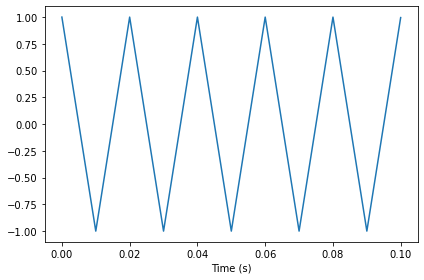

In [2]:
from thinkdsp import TriangleSignal, decorate

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

diff треугольного сигнала - прямоугольный сигнал, что объясняет почему гармоники в прямоугольном сигнале спадают как $1/f$, а треугольный сигнал спадает как  $1/f^2$.

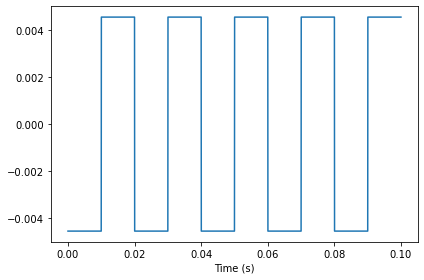

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

(differentiate) Когда мы берем спектральную производную, мы получаем "звон" вокруг разрывов. Проблема заключается в том, что производная треугольной волны не определена в точках треугольника.

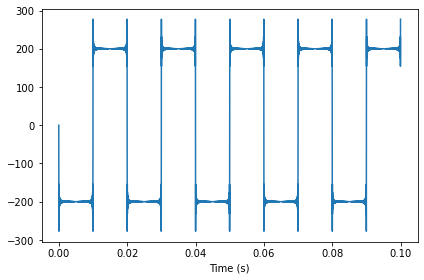

In [5]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Упражнение 9.3

Создадим прямоугольный сигнал, применим cumsum. Вычислим спектр прямоугольного сигнала, применим integrate. Преобразуем спектр обратно в сигнал и напечатаем его.

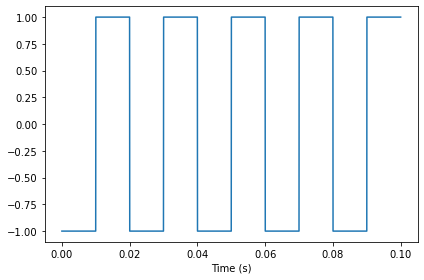

In [6]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

(cumsum) Нарастающая сумма прямоугольной волны - это треугольная волна.

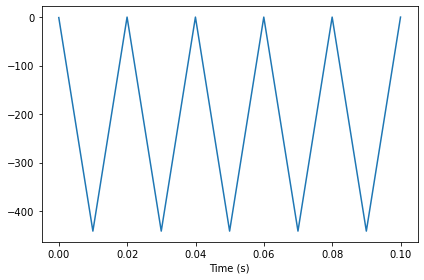

In [7]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

(integrate) Спектральный интеграл также представляет собой треугольную волну, хотя амплитуда у него сильно отличается.

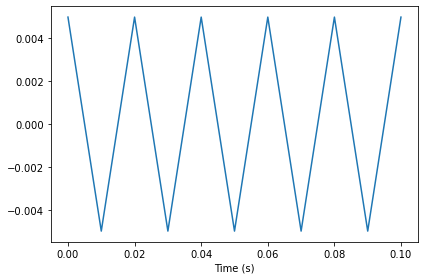

In [8]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Если мы уберем смещения и нормализуем две волны, они будут визуально похожи.

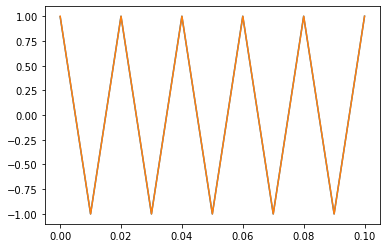

In [9]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

И они численно схожи, но с точностью всего около 3 знаков.

In [10]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

Упражнение 9.4

Создадим пилообразный сигнал, вычислим его спектр, а затем дважды применим integrate. Напечатаем результирующий сигнал и его спектр.

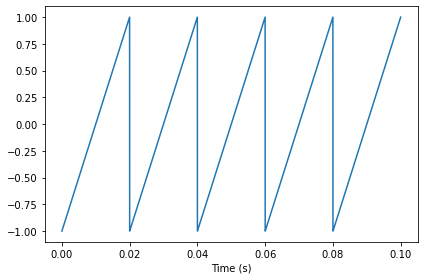

In [11]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Первая нарастающая сумма пилообразной формы представляет собой параболу.

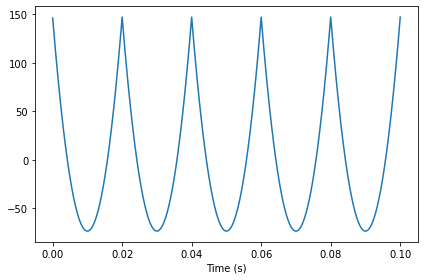

In [12]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

Вторая нарастающая сумма представляет собой кубическую кривую.

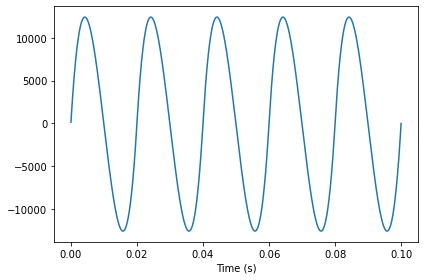

In [13]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Двойное интегрирование также дает кубическую кривую.

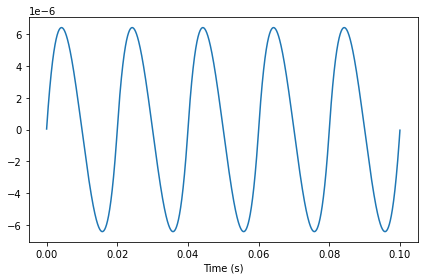

In [14]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

На этом этапе результат все больше и больше напоминает синусоиду. Причина в том, что интегрирование действует как фильтр нижних частот. На данный момент мы отфильтровали почти все.

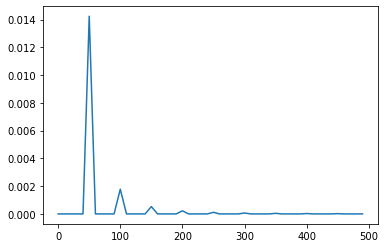

In [15]:
out_wave2.make_spectrum().plot(high=500)

Упражнение 9.5

Создадим CubicSignal. Вычислим вторую разность, дважды применив diff. Вычислим вторую производную, дважды применив differentiate к спектру. Распечатаем фильтры, соответствующие второй разнице и второй производной.

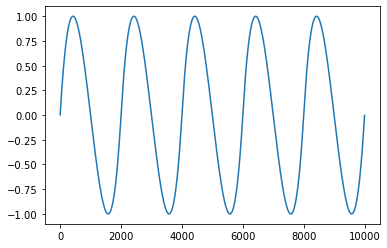

In [16]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Первое отличие - это парабола, а второе отличие - пилообразная волна.

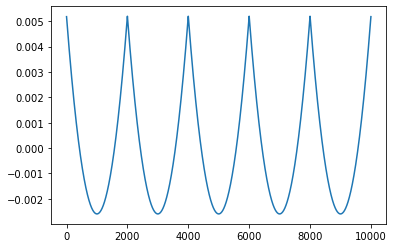

In [17]:
out_wave = in_wave.diff()
out_wave.plot()

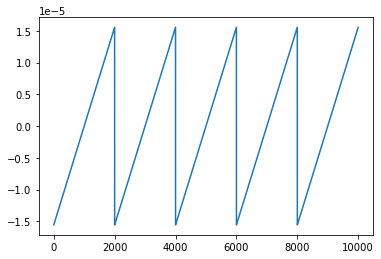

In [18]:
out_wave = out_wave.diff()
out_wave.plot()

Когда мы дифференцируем дважды, мы получаем пилообразный звук с некоторым звоном. Проблема заключается в том, что производная параболического сигнала не определена в точках.

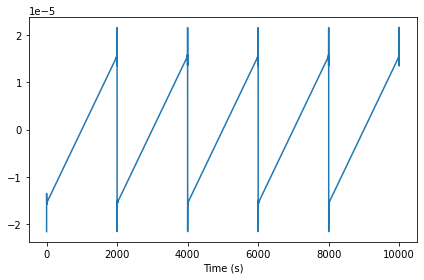

In [19]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Окно второй разности равно -1, 2, -1. Вычисляя DFT окна, мы можем найти соответствующий фильтр.

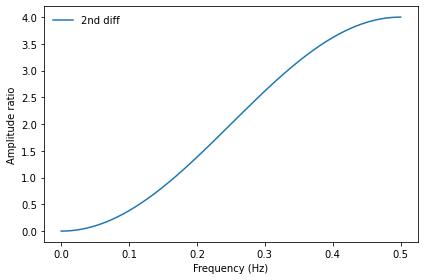

In [21]:
from thinkdsp import zero_pad
from thinkdsp import Wave
import numpy as np

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

А для второй производной мы можем найти соответствующий фильтр, вычислив фильтр первой производной и возведя его в квадрат.

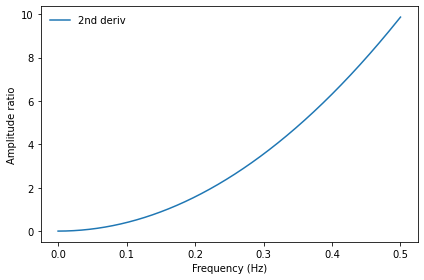

In [22]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Так выглядят два фильтра в одном масштабе:

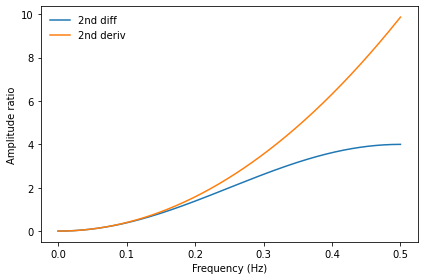

In [23]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба являются фильтрами верхних частот, которые усиливают высокочастотные компоненты. 2-я производная является параболической, поэтому она сильнее всего усиливает самые высокие частоты. 2-я разность является хорошей аппроксимацией 2-й производной только на самых низких частотах, затем она существенно отклоняется.